In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
onehot_enc = OneHotEncoder(sparse_output=False)

In [12]:
df['Geography'] = onehot_enc.fit_transform(pd.DataFrame(df['Geography']))
df['Gender'] = onehot_enc.fit_transform(pd.DataFrame(df['Gender']))

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1.0,1.0,42,2,0.00,1,1,1,101348.88,1
1,608,0.0,1.0,41,1,83807.86,1,0,1,112542.58,0
2,502,1.0,1.0,42,8,159660.80,3,1,0,113931.57,1
3,699,1.0,1.0,39,1,0.00,2,0,0,93826.63,0
4,850,0.0,1.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1.0,0.0,39,5,0.00,2,1,0,96270.64,0
9996,516,1.0,0.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1.0,1.0,36,7,0.00,1,0,1,42085.58,1
9998,772,0.0,0.0,42,3,75075.31,2,1,0,92888.52,1


In [14]:
X = df.drop('Exited', axis=1)

In [15]:
X = np.array(X)

In [17]:
from sklearn.cluster import KMeans

In [18]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_predict = kmeans.fit_predict(X)

In [19]:
y_predict

array([ 9, 11, 31, ..., 35, 24, 13])

In [20]:
from sklearn.decomposition import PCA

In [21]:
# use PCA to reduce to 2D for only visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X) 

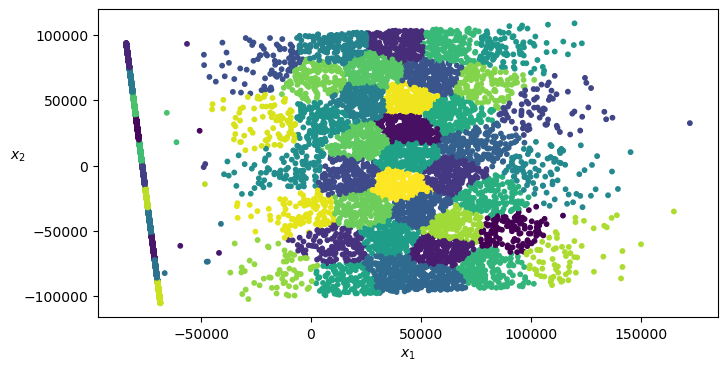

In [23]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y_predict, s=10)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X_pca, y_predict)
plt.show();

In [24]:
y_predict

array([ 9, 11, 31, ..., 35, 24, 13])

In [25]:
kmeans.labels_

array([ 9, 11, 31, ..., 35, 24, 13])

In [26]:
y_predict is kmeans.labels_

True

In [27]:
# central coordinates
kmeans.cluster_centers_

array([[ 6.42606557e+02,  4.75409836e-01,  4.59016393e-01,
         3.92622951e+01,  4.65573770e+00,  1.62526033e+05,
         1.37704918e+00,  6.88524590e-01,  5.73770492e-01,
         1.57127993e+05],
       [ 6.52933775e+02,  6.65562914e-01,  4.33774834e-01,
         3.90728477e+01,  5.22516556e+00,  9.29899007e+01,
         1.79801325e+00,  7.21854305e-01,  5.43046358e-01,
         6.57546803e+04],
       [ 6.40966102e+02,  4.23728814e-01,  4.36440678e-01,
         3.94957627e+01,  5.00000000e+00,  1.22979512e+05,
         1.41101695e+00,  6.77966102e-01,  4.70338983e-01,
         7.59166827e+04],
       [ 6.47778846e+02,  6.82692308e-01,  4.51923077e-01,
         3.81666667e+01,  5.29487179e+00,  1.34811763e+02,
         1.74679487e+00,  7.21153846e-01,  4.93589744e-01,
         1.56721192e+05],
       [ 6.44854626e+02,  3.70044053e-01,  4.22907489e-01,
         3.95947137e+01,  5.08370044e+00,  1.29853532e+05,
         1.41850220e+00,  7.13656388e-01,  5.37444934e-01,
         1.

In [29]:
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X_pca)

NameError: name 'plot_decision_boundaries' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
# Churn Analysis with Semi-supervised learning
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_dist = kmeans.fit_transform(X)
representative_digit_idx = X_dist.argmin(axis=0)
X_representative_digits = X[representative_digit_idx]